# Analysis of Brainstorming Transcripts using Empath
Empath is a tool for analyzing text across lexical categories. It has a set of pre-defined categories obtained through machine learning and crowdsourced verification, and it uses cosine distance metrics to assign category weights to any given corpus of text. Here we use it to view the distribution of categories between the free and D-C groups.

In [1]:
from empath import Empath
import re

# Locations of input files. These files have been anonymized, and the files themselves will not be available
# in this folder, to preserve the privacy of the teams.
textPathFree = "../../../private/brainstorming_viz_data/free_group/"
textPathDC = "../../../private/brainstorming_viz_data/d-c_group/"

# Teamwise transcript (of divergent processes) of the "Free Brainstorming" group
fileNamesFreeDivergent = ['teamA_part1_divergent.txt', 'teamB_part1_divergent.txt', 'teamC_part1_divergent.txt',
                          'teamD_part1_divergent.txt', 'teamE_part1_divergent.txt', 'teamF_part1_divergent.txt',
                          'teamG_part1_divergent.txt', 'teamH_part1_divergent.txt', 'teamI_part1_divergent.txt']

# Teamwise transcript (of divergent processes) of the "Divergent-Convergent (D-C) Brainstorming" group
fileNamesDCDivergent = ['teamJ_part1_divergent.txt', 'teamJ_part3_divergent.txt', 'teamK_part1_divergent.txt',
                        'teamK_part3_divergent.txt', 'teamL_part1_divergent.txt', 'teamL_part3_divergent.txt', 
                        'teamM_part1_divergent.txt', 'teamM_part2_3_convergent_divergent.txt', 'teamN_part1_divergent.txt',
                        'teamN_part3_divergent.txt', 'teamO_part1_divergent.txt', 'teamO_part2_3_conv_div.txt',
                        'teamP_part1_divergent.txt', 'teamP_part3_divergent.txt', 'teamQ_part1_divergent.txt',
                        'teamQ_part3_4_div_conv.txt', 'teamR_part1_divergent.txt', 'teamR_part3_divergent.txt'] 

# Teamwise transcript (of divergent processes) of the "Free Brainstorming" group
fileNamesFreeConvergent = ['teamA_part2_convergent.txt', 'teamB_part2_convergent.txt', 'teamC_part2_convergent.txt',
                           'teamD_part2_convergent.txt', 'teamE_part2_convergent.txt', 'teamF_part2_convergent.txt',
                           'teamG_part2_convergent.txt', 'teamH_part2_convergent.txt', 'teamI_part2_convergent.txt']

# Teamwise transcript (of divergent processes) of the "Divergent-Convergent (D-C) Brainstorming" group
fileNamesDCConvergent = ['teamJ_part2_convergent.txt', 'teamJ_part4_convergent.txt', 'teamK_part2_convergent.txt',
                         'teamK_part4_convergent.txt', 'teamL_part2_convergent.txt', 'teamL_part4_convergent.txt',
                         'teamM_part4_convergent.txt', 'teamN_part2_convergent.txt', 'teamN_part4_convergent.txt',
                         'teamO_part4_convergent.txt', 'teamP_part2_convergent.txt', 'teamP_part4_convergent.txt',
                         'teamQ_part2_convergent.txt', 'teamR_part2_convergent.txt', 'teamR_part4_convergent.txt']  

# Separating Different Stages of the Divergent and Convergent Process 
fileNamesDCDivergentStage1 = ['teamJ_part1_divergent.txt', 'teamK_part1_divergent.txt', 'teamL_part1_divergent.txt',
                              'teamM_part1_divergent.txt', 'teamN_part1_divergent.txt', 'teamO_part1_divergent.txt',
                              'teamP_part1_divergent.txt', 'teamQ_part1_divergent.txt', 'teamR_part1_divergent.txt']

fileNamesDCDivergentStage2 = ['teamJ_part3_divergent.txt', 'teamK_part3_divergent.txt', 'teamL_part3_divergent.txt', 
                              'teamM_part2_3_convergent_divergent.txt', 'teamN_part3_divergent.txt', 'teamO_part2_3_conv_div.txt',
                              'teamP_part3_divergent.txt', 'teamQ_part3_4_div_conv.txt', 'teamR_part3_divergent.txt']

fileNamesDCConvergentStage1 = ['teamJ_part2_convergent.txt', 'teamK_part2_convergent.txt', 'teamL_part2_convergent.txt',
                               'teamN_part2_convergent.txt', 'teamP_part2_convergent.txt', 'teamQ_part2_convergent.txt',
                               'teamR_part2_convergent.txt'] 

fileNamesDCConvergentStage2 = ['teamJ_part4_convergent.txt', 'teamK_part4_convergent.txt', 'teamL_part4_convergent.txt',
                               'teamM_part4_convergent.txt', 'teamN_part4_convergent.txt', 'teamO_part4_convergent.txt',
                               'teamP_part4_convergent.txt', 'teamR_part4_convergent.txt']

def openFiles(fileNamesList, filePath):
    # Given a list of file names and a path for the files, returns a
    # list of file objects
    fObjList = []
    for fileName in fileNamesList:
        fObj = open(filePath + fileName, 'r', encoding='utf8')
        fObjList.append(fObj)
    return fObjList

# Some of these files have non-UTF characters that may need to be removed.
def removeSpecials(filesList):
    # Remove some incompatible unicode characters such as distinct
    # opening and closing quotes, ellipsis etc.
    # Also finally converts all text to lowercase
    outString = ''
    for inFile in filesList:
        # print("reading file",inFile.name.split("/")[-1], "...", end="")
        temp = inFile.read()
        subsFileQuotes = re.sub(u"(\u2018|\u2019)", "'", temp)
        subsFileDQuotes = re.sub(u'(\u201c|\u201d)', '"', subsFileQuotes)
        subsFileEllipsis = re.sub(u"\u2026", "...", subsFileDQuotes)
        outString += subsFileEllipsis
        # print("done.")
    return outString.lower()

# These files have the transcriber's observations like [laughter], [silent], [cross-talk] etc.
# These may throw off the text analysis, so we remove them. These are typically within parantheses,
# so we can remove everything between these parantheses.

def removeObservations(test_str) :
    # removes all text within parantheses
    # these are usually observations by the transcriber
    # and thus should not be considered in content analysis
    # code from http://stackoverflow.com/questions/14596884/remove-text-between-and-in-python
    ret = ''
    skip1c = 0
    skip2c = 0
    squareparen = 0
    for i in test_str:
        if i == '[':
            skip1c += 1
            squareparen += 1
        elif i == '(':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == ')'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret

filesListFree = openFiles(fileNamesFreeDivergent + fileNamesFreeConvergent, textPathFree)
filesListDC = openFiles(fileNamesDCDivergent + fileNamesDCConvergent, textPathDC)

group1_raw = removeSpecials(filesListFree)
group2_raw = removeSpecials(filesListDC)

group1 = removeObservations(group1_raw)
group2 = removeObservations(group2_raw)

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 15)
from matplotlib import pyplot as plt
import numpy as np

lexicon = Empath()

components = lexicon.create_category("toy_components", 
                                     ["spring", "screw", "ball", "wheel", "catapult", "launcher",
                                      "string", "light", "button", "target", "pump", "crank"], model="reddit")
toy_types = lexicon.create_category("toy_types", 
                                    ["car", "doll", "lego", "barbie", "gun", "game", 
                                     "frisbee", "wind_up", "helicopter", "airplane", "action_figure"], model="reddit")

def plot_top_cats(categories_dict, num_categories):
    cat_names = []
    cat_vals = []
    for ind, w in enumerate(sorted(categories_dict, key=categories_dict.get)):
        if not categories_dict[w] == 0:
            cat_names.append(w)
            cat_vals.append(categories_dict[w])
    cat_names = cat_names[-num_categories:]
    cat_vals = cat_vals[-num_categories:]
    pylab.rcParams['figure.figsize'] = (16, round(num_categories/3))
    yTicks = np.arange(len(cat_names))
    # yTicks_grp1 = [x+0.2 for x in yTicks]
    ax = plt.subplot(111)
    ax.barh(yTicks, cat_vals, height=0.5, color='#a6cee3', align='center', lw=0)
    ax.set_yticks(yTicks)
    ax.set_yticklabels(cat_names)
    ax.set_ylim([-1, len(cat_names)])
    plt.show()
    

def compare_cats(cat_dict1, cat_name1, cat_dict2, cat_name2, num_categories):
    combined_weights = {}
    for key in cat_dict1:
        combined_weights[key] = cat_dict1[key] + cat_dict2[key]

    cat_names = []
    cat1_vals = []
    cat2_vals = []
    for ind, w in enumerate(sorted(combined_weights, key=combined_weights.get)):
        if not (cat_dict1[w] == 0 and cat_dict2[w] == 0):
            cat_names.append(w)
            cat1_vals.append(cat_dict1[w])
            cat2_vals.append(cat_dict2[w])
    cat_names = cat_names[-num_categories:]
    cat1_vals = cat1_vals[-num_categories:]
    cat2_vals = cat2_vals[-num_categories:]
    pylab.rcParams['figure.figsize'] = (16, round(num_categories/2))
    yTicks = np.arange(len(cat_names))
    yTicks_cat1 = [x+0.2 for x in yTicks]
    yTicks_cat2 = [x-0.2 for x in yTicks]
    ax = plt.subplot(111)
    ax.barh(yTicks_cat1, cat1_vals, height=0.38, color='#a6cee3', align='center', lw=0)
    ax.barh(yTicks_cat2, cat2_vals, height=0.38, color='#fdb462', align='center', lw=0)
    ax.set_yticks(yTicks)
    ax.set_yticklabels(cat_names)
    ax.set_ylim([-1, len(cat_names)+2])
    legend([cat_name1, cat_name2], loc=9)
    plt.show()

Populating the interactive namespace from numpy and matplotlib
["cone", "dart", "HunterSmith", "t7710404", "grabber", "beam", "arrow", "right_spot", "slide", "sideways", "thruster", "n6608273", "left_mouse_button", "bolt", "then_fire", "instant", "sideways", "sideways", "missle", "detonator", "rocket", "arrows", "catapult", "target_area", "button", "midair", "right_mouse", "grenade", "air", "forward_direction", "max_distance", "ground", "1_second", "bead", "eject", "horizontal_position", "arrows", "balloon", "accelerate", "piston", "feather", "projectile", "1-2_seconds", "target", "radial", "Blinker_Fluid", "mid-air", "block", "straight_line", "thingy", "spinning", "shell", "Thrust", "accelerator", "mid_air", "bounce", "square", "thrower", "fixed_position", "fire", "right_trigger", "thingie", "about_2_seconds", "homing", "thingies", "solid_object", "verticle", "____end", "pulse", "right_mouse_button", "wrench", "cylinder", "laser_beam", "trick", "explode", "set_distance", "light", "gen

## Viewing the dominance of each category in the Transcript: Free vs. D-C Groups
The above code takes the raw text from the free and D-C groups, and identifies the dominance of each of Empath's categories in the text. We now visualize the distribution of these categories below.

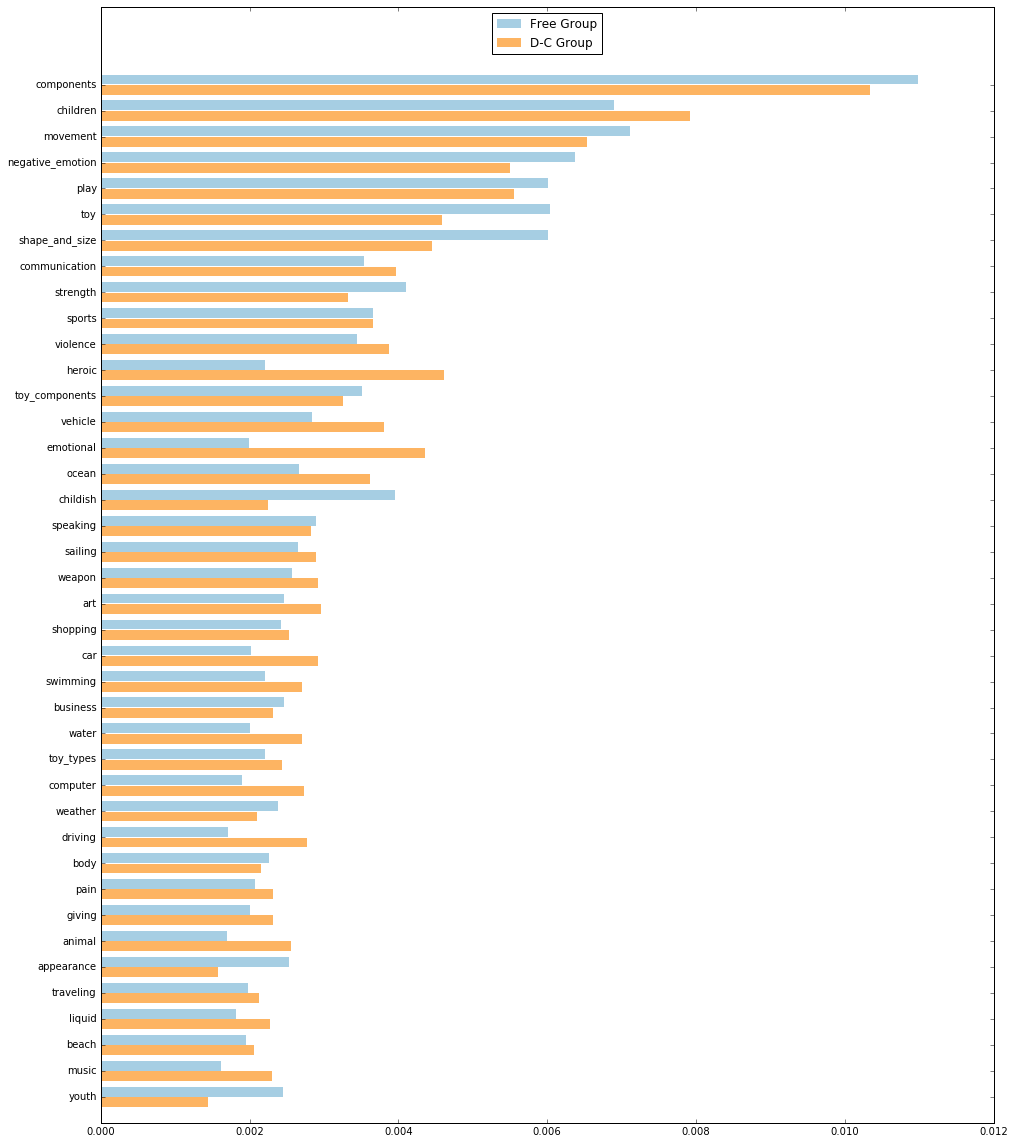

In [3]:
group1_categories = lexicon.analyze(group1, normalize=True)
group2_categories = lexicon.analyze(group2, normalize=True)
compare_cats(group1_categories, "Free Group", group2_categories, "D-C Group", 40)

### Drilling Down: Divergent Vs. Convergent Processes

In [10]:
filesListFreeDiv = openFiles(fileNamesFreeDivergent, textPathFree)
filesListDCDiv = openFiles(fileNamesDCDivergent, textPathDC)

group1_raw_div = removeSpecials(filesListFreeDiv)
group2_raw_div = removeSpecials(filesListDCDiv)

group1_div = removeObservations(group1_raw_div)
group2_div = removeObservations(group2_raw_div)

group1_div_categories = lexicon.analyze(group1_div, normalize=True)
group2_div_categories = lexicon.analyze(group2_div, normalize=True)

filesListFreeConv = openFiles(fileNamesFreeConvergent, textPathFree)
filesListDCConv = openFiles(fileNamesDCConvergent, textPathDC)

group1_raw_conv = removeSpecials(filesListFreeConv)
group2_raw_conv = removeSpecials(filesListDCConv)

group1_conv = removeObservations(group1_raw_conv)
group2_conv = removeObservations(group2_raw_conv)

group1_conv_categories = lexicon.analyze(group1_conv, normalize=True)
group2_conv_categories = lexicon.analyze(group2_conv, normalize=True)

filesListDCDivStage1 = openFiles(fileNamesDCDivergentStage1, textPathDC)
filesListDCDivStage2 = openFiles(fileNamesDCDivergentStage2, textPathDC)
group2_raw_div_stage1 = removeSpecials(filesListDCDivStage1)
group2_raw_div_stage2 = removeSpecials(filesListDCDivStage2)
group2_div_stage1 = removeObservations(group2_raw_div_stage1)
group2_div_stage2 = removeObservations(group2_raw_div_stage2)
group2_div_categories_stage1 = lexicon.analyze(group2_div_stage1, normalize=True)
group2_div_categories_stage2 = lexicon.analyze(group2_div_stage2, normalize=True)

filesListDCConvStage1 = openFiles(fileNamesDCConvergentStage1, textPathDC)
filesListDCConvStage2 = openFiles(fileNamesDCConvergentStage2, textPathDC)
group2_raw_conv_stage1 = removeSpecials(filesListDCConvStage1)
group2_raw_conv_stage2 = removeSpecials(filesListDCConvStage2)
group2_conv_stage1 = removeObservations(group2_raw_conv_stage1)
group2_conv_stage2 = removeObservations(group2_raw_conv_stage2)
group2_conv_categories_stage1 = lexicon.analyze(group2_conv_stage1, normalize=True)
group2_conv_categories_stage2 = lexicon.analyze(group2_conv_stage2, normalize=True)

### Compare category distribution for divergent processes between free and d-c group

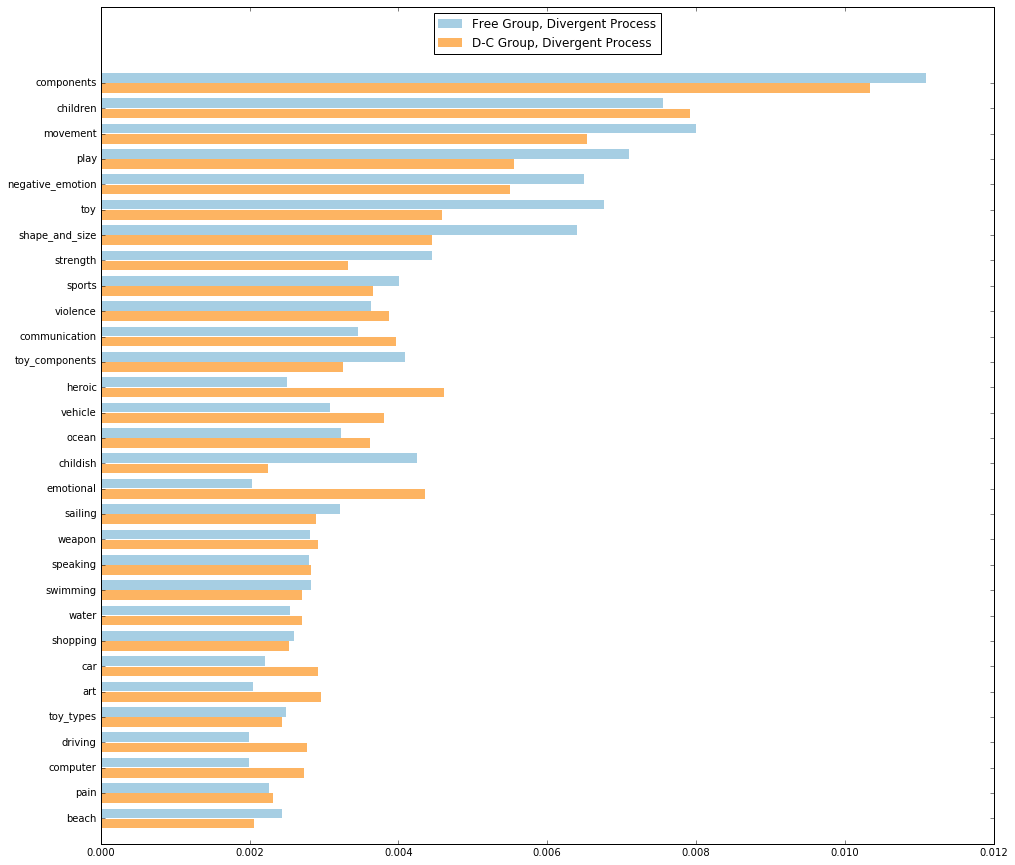

In [11]:
compare_cats(group1_div_categories, "Free Group, Divergent Process", group2_div_categories, "D-C Group, Divergent Process", 30)

### Compare category distribution for convergent processes between free and d-c group

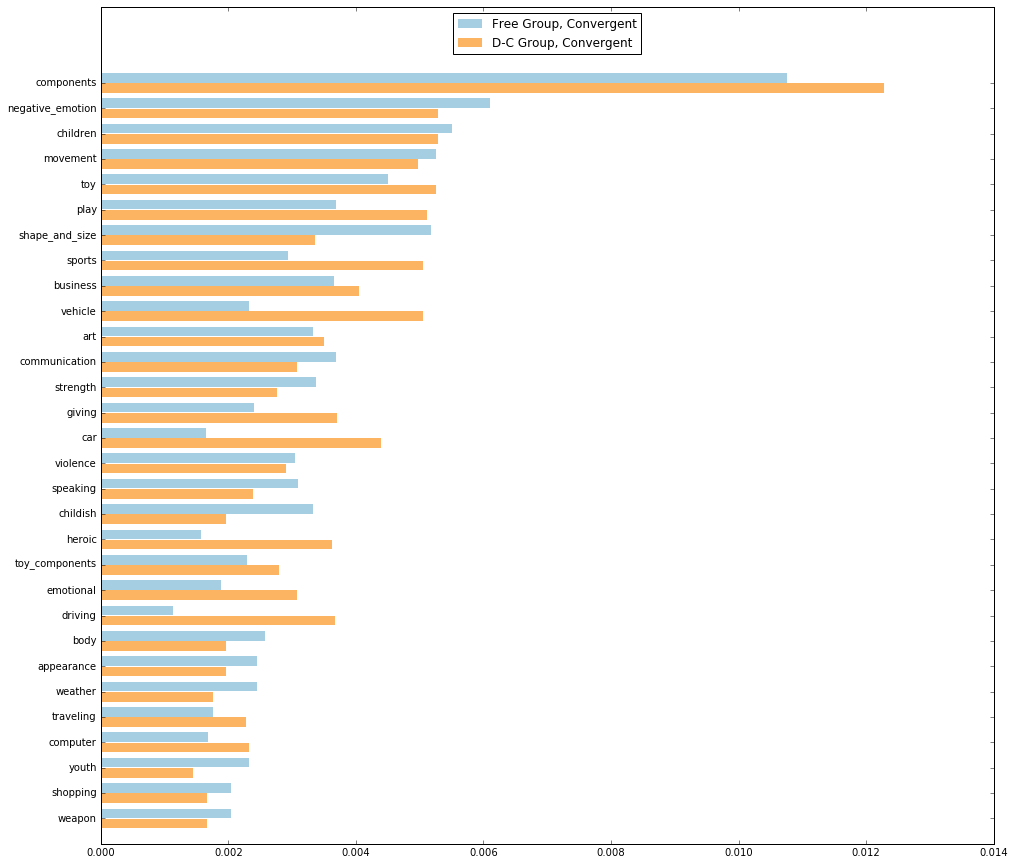

In [12]:
compare_cats(group1_conv_categories, "Free Group, Convergent", group2_conv_categories, "D-C Group, Convergent", 30)

### Within the same group, compare categories between divergent and convergent processes

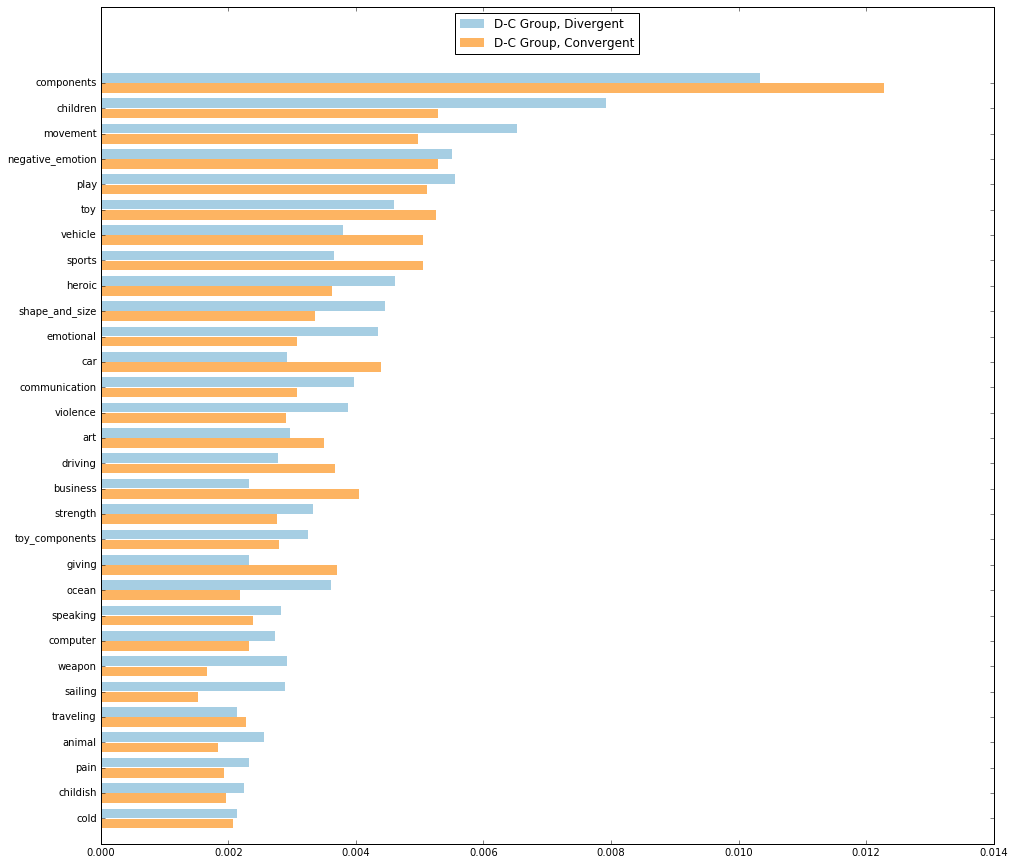

In [13]:
compare_cats(group2_div_categories, "D-C Group, Divergent", group2_conv_categories, "D-C Group, Convergent", 30)

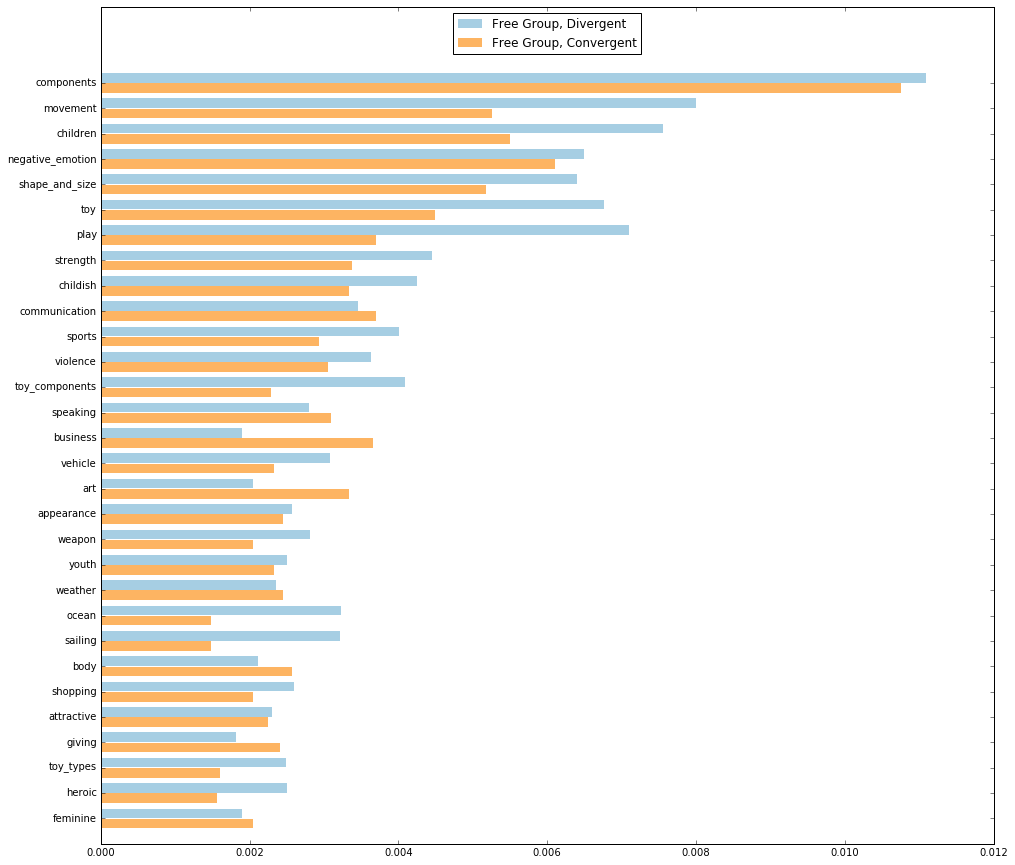

In [14]:
compare_cats(group1_div_categories, "Free Group, Divergent", group1_conv_categories, "Free Group, Convergent", 30)

### Drilling Down Even Further: Comparing Stages
#### D-C Group: Comparing Divergent Stages

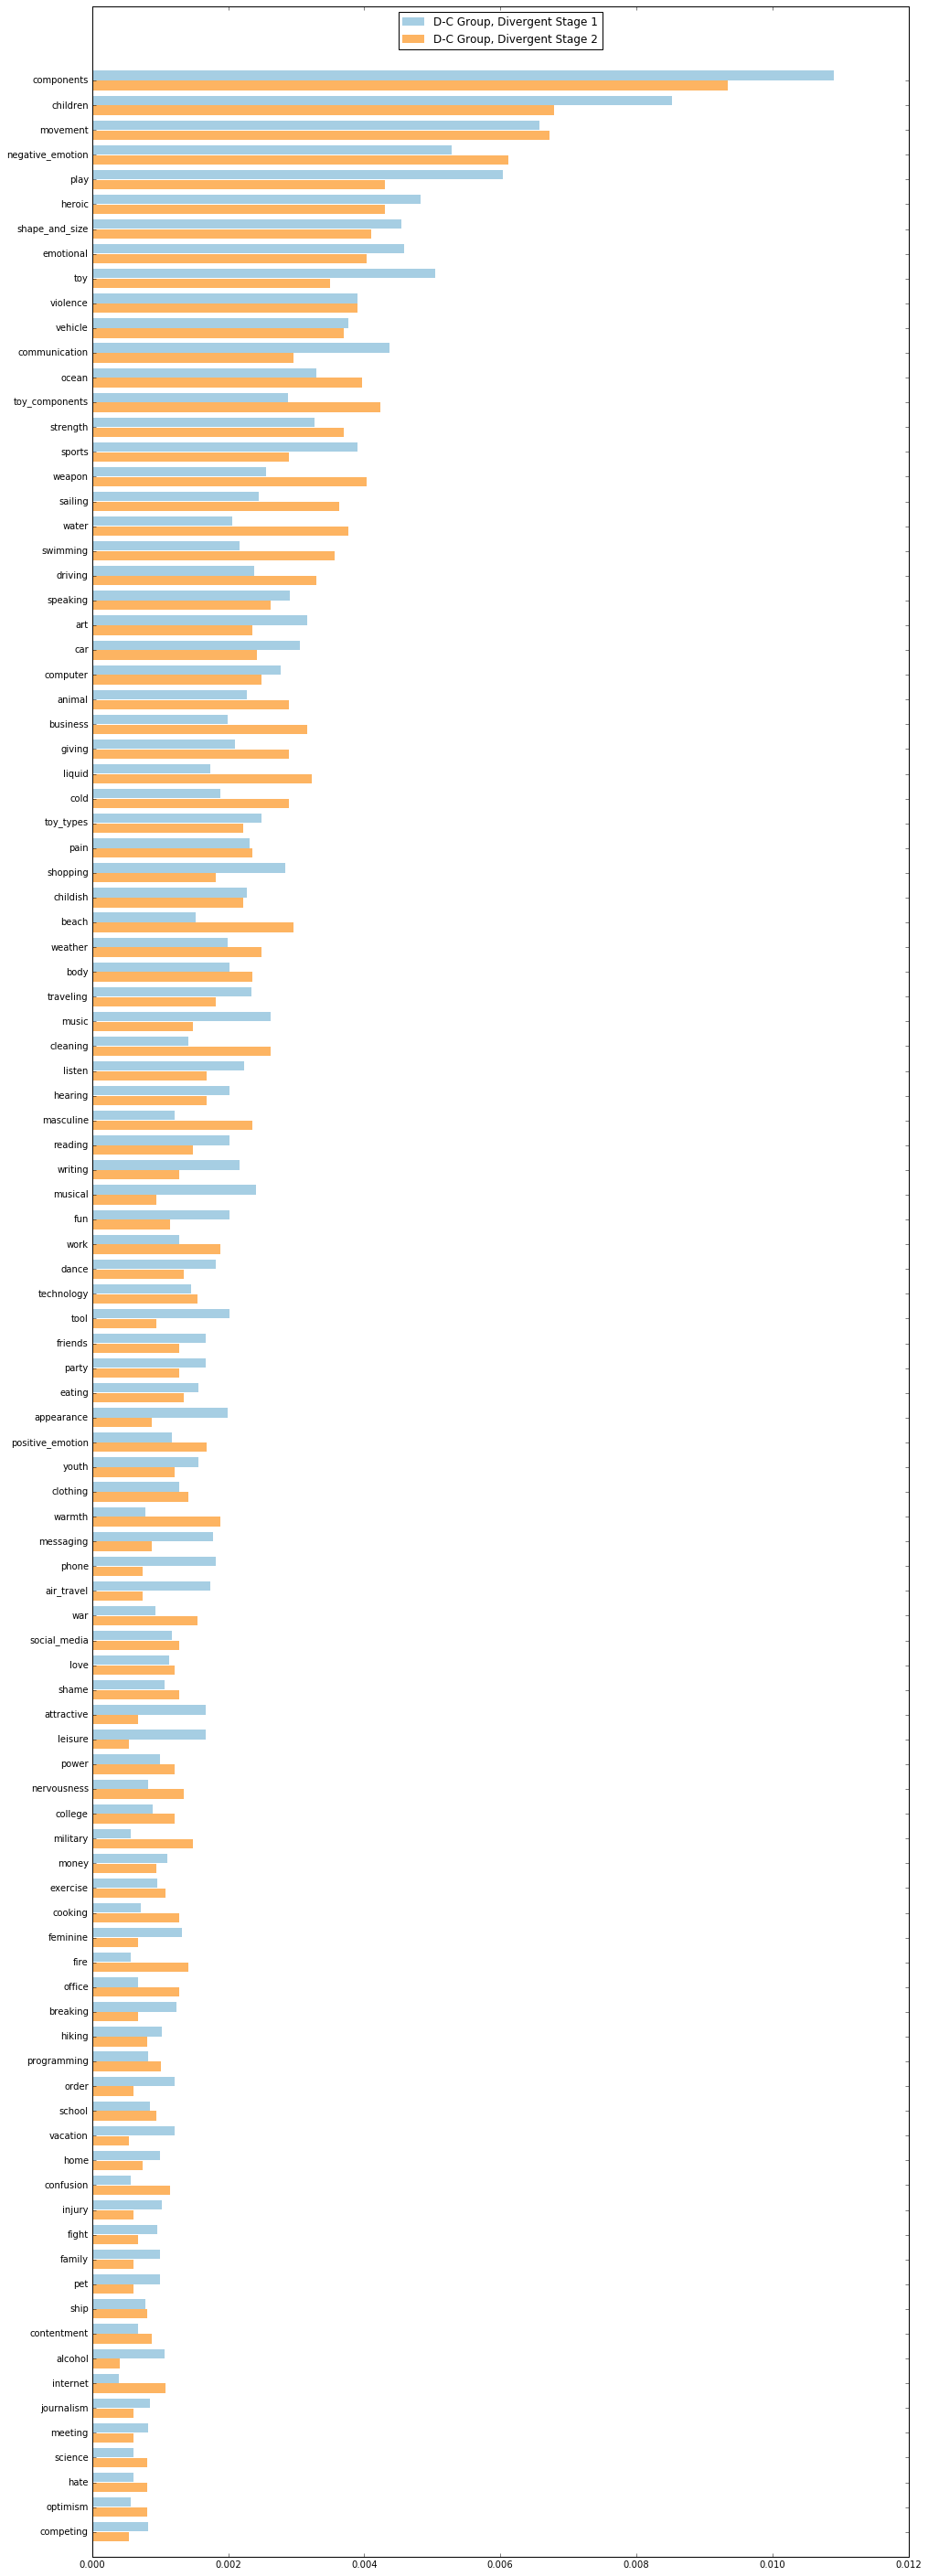

In [16]:
compare_cats(group2_div_categories_stage1, "D-C Group, Divergent Stage 1", group2_div_categories_stage2, "D-C Group, Divergent Stage 2", 100)